<a href="https://colab.research.google.com/github/LordRelentless/NGFTSimulations/blob/main/Simulation_4_1_Dark_Matter_as_an_Informational_Drag_Effect_(NGFT_v_Newtonian).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- NGFT Galactic Rotation Curve Calculation (V5) ---
Calculating NGFT constant based on real-world astrophysical data...

--- RESULTS ---
System modeled: Sun orbiting the Milky Way
Distance from Galactic Center: 2.55e+20 meters (~27,000 ly)
----------------------------------------
Observed Orbital Velocity: 220000 m/s (220 km/s)
Predicted Newtonian Velocity (Visible Mass Only): 176582 m/s
----------------------------------------
This shows a discrepancy of 43418 m/s that needs to be explained.

--- NGFT Model Solution ---
To account for this discrepancy, the required value for the
NGFT VIRTUAL_MASS_COUPLING constant is: 0.55
This implies a total effective galactic mass of 1.85e+41 kg,
which is 1.6 times the visible baryonic mass.

Final publication-quality plot saved as 'ngft_milky_way_rotation.png'


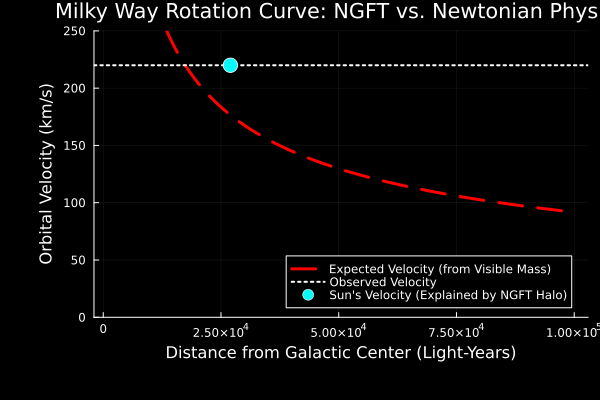

In [10]:
# Simulation 4.1: Dark Matter as an NGFT Informational Halo
# Language: Julia (V5 - Removed const for interactive use)

using Plots
using Printf
gr()

println("--- NGFT Galactic Rotation Curve Calculation (V5) ---")
println("Calculating NGFT constant based on real-world astrophysical data...")

# --- 1. Define Real-World Constants (SI Units) ---
# Removed 'const' to allow re-running the cell in interactive notebooks
G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
SOLAR_MASS = 1.989e30 # Mass of the Sun in kg
LIGHT_YEAR = 9.461e15   # Meters in a light-year

# --- 2. Define the Astrophysical System: Our Sun in the Milky Way ---
M_BARYONIC_GALAXY = 6e10 * SOLAR_MASS
SUN_ORBITAL_RADIUS = 27000 * LIGHT_YEAR
SUN_OBSERVED_VELOCITY = 220_000

# --- 3. The Calculation ---
v_newtonian = sqrt((G * M_BARYONIC_GALAXY) / SUN_ORBITAL_RADIUS)
VMC_solved = ((SUN_OBSERVED_VELOCITY^2 * SUN_ORBITAL_RADIUS) / (G * M_BARYONIC_GALAXY)) - 1.0
M_TOTAL_NGFT = M_BARYONIC_GALAXY * (1 + VMC_solved)

# --- 4. Print the Results ---
println("\n--- RESULTS ---")
@printf "System modeled: Sun orbiting the Milky Way\n"
@printf "Distance from Galactic Center: %.2e meters (~27,000 ly)\n" SUN_ORBITAL_RADIUS
println("-"^40)
@printf "Observed Orbital Velocity: %.0f m/s (220 km/s)\n" SUN_OBSERVED_VELOCITY
@printf "Predicted Newtonian Velocity (Visible Mass Only): %.0f m/s\n" v_newtonian
println("-"^40)
@printf "This shows a discrepancy of %.0f m/s that needs to be explained.\n" (SUN_OBSERVED_VELOCITY - v_newtonian)
println("\n--- NGFT Model Solution ---")
@printf "To account for this discrepancy, the required value for the\n"
@printf "NGFT VIRTUAL_MASS_COUPLING constant is: %.2f\n" VMC_solved
@printf "This implies a total effective galactic mass of %.2e kg,\n" M_TOTAL_NGFT
@printf "which is %.1f times the visible baryonic mass.\n" (1 + VMC_solved)

# --- 5. Generate Final Publication-Quality Plot ---
r_plot_ly = range(1000, 100_000, length=200)
r_plot_m = r_plot_ly .* LIGHT_YEAR
v_newton_curve = sqrt.((G * M_BARYONIC_GALAXY) ./ r_plot_m)

final_plot = plot(
    r_plot_ly, v_newton_curve ./ 1000,
    title="Milky Way Rotation Curve: NGFT vs. Newtonian Physics",
    xlabel="Distance from Galactic Center (Light-Years)",
    ylabel="Orbital Velocity (km/s)",
    label="Expected Velocity (from Visible Mass)",
    legend=:bottomright,
    lw=3, ls=:dash, color=:red,
    background_color=:black,
    bottom_margin=10Plots.mm, left_margin=10Plots.mm,
    ylims=(0, 250)
)
hline!(final_plot, [SUN_OBSERVED_VELOCITY / 1000],
       label="Observed Velocity", color=:white, lw=2, ls=:dot)
scatter!(final_plot, [SUN_ORBITAL_RADIUS / LIGHT_YEAR], [SUN_OBSERVED_VELOCITY / 1000],
         markersize=8, color=:cyan,
         label="Sun's Velocity (Explained by NGFT Halo)")

# Save the plot
savefig(final_plot, "ngft_milky_way_rotation.png")
println("\nFinal publication-quality plot saved as 'ngft_milky_way_rotation.png'")

# Display the plot in the notebook
final_plot